In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [4]:
DEBUG = True

def debug(str):
    if DEBUG:
        print(str)


In [5]:
"""

data = np.random.randint(10,35, size=(25,1))
data = np.append(data, np.random.randint(55,75, size=(25,1)))
data = np.append(data, np.random.randint(100,150, size=(25,1)))

data1 = np.append(np.append(np.random.randint(10,35, size=(25,1)), np.random.randint(55,75, size=(25,1))), np.random.randint(100,150, size=(25,1)))

#data = np.concatenate((data, data1.T), axis = 1)
#data = np.append(data,np.append(np.append(np.random.randint(10,35, size=25), np.random.randint(55,75, size=25)), np.random.randint(100,150, size=25)),axis=1)
"""

'\n\ndata = np.random.randint(10,35, size=(25,1))\ndata = np.append(data, np.random.randint(55,75, size=(25,1)))\ndata = np.append(data, np.random.randint(100,150, size=(25,1)))\n\ndata1 = np.append(np.append(np.random.randint(10,35, size=(25,1)), np.random.randint(55,75, size=(25,1))), np.random.randint(100,150, size=(25,1)))\n\n#data = np.concatenate((data, data1.T), axis = 1)\n#data = np.append(data,np.append(np.append(np.random.randint(10,35, size=25), np.random.randint(55,75, size=25)), np.random.randint(100,150, size=25)),axis=1)\n'

In [6]:
def create_data(lowerlimit, upperlimit, length):
    x = np.random.randint(lowerlimit,upperlimit, size=(length,1))
    y = np.random.randint(lowerlimit,upperlimit, size=(length,1))

    data = np.append(x,y,axis=1)
    return data, x, y

In [7]:
data, x_data, y_data = create_data(10,35,25)
data1, x_data1, y_data1 = create_data(55,75,25)
data2, x_data2, y_data2 = create_data(100,150,25)

data = np.concatenate((data, data1, data2))
data_x = np.concatenate((x_data, x_data1, x_data2))
data_y = np.concatenate((y_data, y_data1, y_data2))

x = x_data.mean()+ x_data1.mean() + x_data2.mean()
y = y_data.mean()+ y_data1.mean() + y_data2.mean()
#X = np.mean(x_data, x_data1, x_data2)
#Y = np.mean(y_data, y_data1, y_data2)
data_mean = [x, y]
print("Mean of the dataset is {}".format(data_mean))
debug(data.shape)

Mean of the dataset is [206.64, 206.4]
(75, 2)


In [29]:
def initial_centroids(data, K):
    index_for_picking_centriods = [np.random.randint(len(data)) for i in range(K)]
    centroids=[]
    for i in index_for_picking_centriods:
        centroids.append(data[i])
    debug(centroids)    
    return centroids

def calculate_distance_from_centroid(data, centroid):
    distance = []
    for i in range(len(data)):
        #distance = np.append(((centroid[0]-data[i][0])**2 + (centroid[1]-data[i][1])**2), axis=1)
        #distance.append(math.sqrt((centroid[0]-data[i][0])**2 + (centroid[1]-data[i][1])**2))
        distance.append(np.sum(np.square(centroid - data[i])))
    #print(distance)
    return distance

#Returns the updated centr-oid
def compute_centroid(data,clusters,k):
    centroid = [] #stores the centroid values
    for i in range(k):
        temp_arr=[]
        for j in range(len(data)):
            #checking one cluster at once and storing the respective cluster data points in the temp_arr
            if clusters[j]==i:
                temp_arr.append(data[j])
        #taking mean among those points and storing it in the centroid array
        centroid.append(np.mean(temp_arr,axis=0))
    return np.asarray(centroid)


def Kmeans(data, K, centroids):
    distance_matrix = calculate_distance_from_centroid(data,centroids[0])
    for i in range(1, len(centroids)):
        distance_matrix = np.column_stack([distance_matrix, calculate_distance_from_centroid(data,centroids[i])])
    #print(distance_matrix)
    debug(distance_matrix)

    #forming clusters based on the value of K. ie., K clusters are formed for grouping the data points
    clusters = []
    for data_points in range(len(distance_matrix)):
        clusters.append(np.argmin(distance_matrix[data_points]))
        #debug("Minimum value of each data point with respect to the clusters")
        #debug(distance_matrix[data_points].min())
        #debug("Clusters for each data point")
        #debug(clusters)
    return clusters

def compute_SSE_between(centroid, cluster, mean_of_data,data,K):
    cluster_count = 0
    for i in range(K):
        for j in range(len(cluster)):
            #checking one cluster at once and storing the respective cluster data points in the temp_arr
            if cluster[j]==i:
                cluster_count+=1
        #taking mean among those points and storing it in the centroid array
        SSE_between = cluster_count * (centroid[i]-mean_of_data)
    print(SSE_between)
    return SSE_between
    

def compute_SSE_total(data, data_mean):
    SSE = 0
    for i in range(len(data)):
        SSE += ((data[i][0]-data_mean[0])+(data[i][1]-data_mean[1]))
    print(SSE)
    return SSE


def main(data, data_mean):
    fraction_of_variance_array = []
    K = int(input("Enter the number of clusters"))
    centroids = initial_centroids(data, K)
    debug("Randomly chosen initial centroids: {}".format(centroids))
    current_cluster = Kmeans(data, K, centroids)
    debug("Initial cluster: {}".format(current_cluster))
    updated_centroid = compute_centroid(data, current_cluster, K)
    debug(updated_centroid)
    updated_cluster = Kmeans(data, K, updated_centroid)
    while not np.array_equal(current_cluster,updated_cluster): 
          current_cluster = updated_cluster
          updated_centroid = compute_centroid(data, current_cluster, K)
          updated_cluster = Kmeans(data, K, updated_centroid)
        
    if(np.array_equal(current_cluster,updated_cluster)): 
        print("The two arrays are equal for K: {}".format(K))
        SSE_between = compute_SSE_between(updated_centroid,updated_cluster,data_mean,data,K)
        print(SSE_between)
        SSE_total = compute_SSE_total(data, data_mean)
        print(SSE_total)
        fraction_of_variance = SSE_between/SSE_total
        fraction_of_variance_array.append(fraction_of_variance)
    return updated_cluster

"""

def main(data, data_mean):
    fraction_of_variance_array = []
    for K in range(1, 9):
        #K = int(input("Enter the number of clusters"))
        centroids = initial_centroids(data, K)
        debug("Randomly chosen initial centroids: {}".format(centroids))
        current_cluster = Kmeans(data, K, centroids)
        debug("Initial cluster: {}".format(current_cluster))
        updated_centroid = compute_centroid(data, current_cluster, K)
        debug(updated_centroid)
        updated_cluster = Kmeans(data, K, updated_centroid)
        debug("Updated cluster: {}".format(updated_cluster))
        while not np.array_equal(current_cluster,updated_cluster): 
            current_cluster = updated_cluster
            updated_centroid = compute_centroid(data, current_cluster, K)
            updated_cluster = Kmeans(data, K, updated_centroid)
        
        if(np.array_equal(current_cluster,updated_cluster)): 
            print("The two arrays are equal for K: {}".format(K))

            SSE_between = compute_SSE_between(updated_centroid,updated_cluster,data_mean,data,K)
            print(SSE_between)
            SSE_total = compute_SSE_total(data, data_mean)
            print(SSE_total)
            fraction_of_variance = SSE_between/SSE_total
            fraction_of_variance_array.append(fraction_of_variance)


    X=[]
    for i in range(1,9):
        X.append(i)
    plt.plot(X, fraction_of_variance_array)
    plt.show()
    return updated_cluster

"""

'\n\ndef main(data, data_mean):\n    fraction_of_variance_array = []\n    for K in range(1, 9):\n        #K = int(input("Enter the number of clusters"))\n        centroids = initial_centroids(data, K)\n        debug("Randomly chosen initial centroids: {}".format(centroids))\n        current_cluster = Kmeans(data, K, centroids)\n        debug("Initial cluster: {}".format(current_cluster))\n        updated_centroid = compute_centroid(data, current_cluster, K)\n        debug(updated_centroid)\n        updated_cluster = Kmeans(data, K, updated_centroid)\n        debug("Updated cluster: {}".format(updated_cluster))\n        while not np.array_equal(current_cluster,updated_cluster): \n            current_cluster = updated_cluster\n            updated_centroid = compute_centroid(data, current_cluster, K)\n            updated_cluster = Kmeans(data, K, updated_centroid)\n        \n        if(np.array_equal(current_cluster,updated_cluster)): \n            print("The two arrays are equal for K: {

In [30]:
label = main(data, data_mean)

Enter the number of clusters3
[array([58, 55]), array([26, 13]), array([74, 62])]
Randomly chosen initial centroids: [array([58, 55]), array([26, 13]), array([74, 62])]
[[ 3305   169  5536]
 [ 3965   197  6344]
 [ 2521    45  4450]
 [ 2378   482  4381]
 [ 2689   145  4736]
 [ 1901   265  3690]
 [ 2245    85  4100]
 [ 2746    98  4789]
 [ 2533    17  4426]
 [ 2257   137  4148]
 [ 2048   100  3825]
 [ 1808   196  3529]
 [ 2196   160  4073]
 [ 2788     0  4705]
 [ 2512   468  4561]
 [ 3700   104  5965]
 [ 3114   250  5321]
 [ 1901    85  3528]
 [ 1885   229  3656]
 [ 3305   169  5536]
 [ 1409   305  2960]
 [ 3033   481  5252]
 [ 2320   116  4225]
 [ 1885   229  3656]
 [ 1872   100  3449]
 [   72  3748   101]
 [    0  2788   305]
 [  117  4045   104]
 [   17  3205   234]
 [  232  4580   149]
 [  180  4240    17]
 [  421  5365    68]
 [  241  4545   208]
 [  493  5625   130]
 [   40  3204   325]
 [   25  2957   370]
 [  265  4205   442]
 [  305  4705     0]
 [    1  2853   274]
 [    1  287

In [10]:
from sklearn.cluster import KMeans
from scipy.spatial import distance


km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in K:
	# Building and fitting the model
	kmeanModel = KMeans(n_clusters=k).fit(data)
	kmeanModel.fit(data)

	distortions.append(sum(np.min(distance.cdist(data, kmeanModel.cluster_centers_,
										'euclidean'), axis=1)) / data.shape[0])
	inertias.append(kmeanModel.inertia_)

	mapping1[k] = sum(np.min(distance.cdist(data, kmeanModel.cluster_centers_,
								'euclidean'), axis=1)) / data.shape[0]
	mapping2[k] = kmeanModel.inertia_


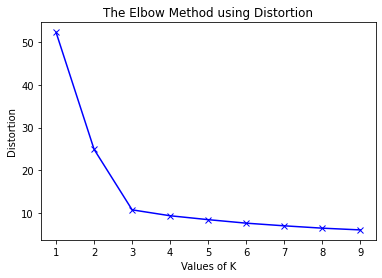

In [11]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()


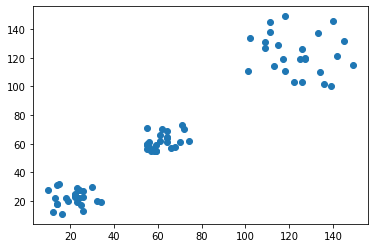

In [12]:
plt.scatter(data_x, data_y)
plt.show()

In [20]:
print("Optimal K value is 3")

Optimal K value is 3


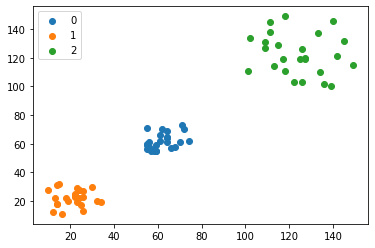

In [31]:
#Getting unique labels
 
u_labels = np.unique(label)
 
for i in u_labels:
    plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)
plt.legend()
plt.show()